## DAV 5400 Fall 2019 Project 2  - Sara Ferrari and Michael Vizelman##
### Project Objectives ###
___
- Make use of Python’s Pandas library
- Perform basic exploratory data analysis on a novel data set
- Create graphics using Matplotlib and Seaborn as part of the exploratory data analysis work
- Present the work in the form of a more “formal” research paper framework

### Introduction ###
___ 
For this project we will make use of publicly available data regarding Gun Violence Incidents in the United States, focusing on data related to Mass Shooting Incidents between 2014 and 2019.  

Our research questions for this project is:  
What were the top 5 US States and Citys by Percentage of Total Mass Shooting incidents in the US over the period 2014-2019 ?   
What was the distribution of total people involed (killed and injured) over that period in the city with the most incidents ?

We believe the answers to these questions would be beneficial for both the private citizen and the government. 
Individuals who are considering relocating to a new state or city would want to be able to compare the frequency of gun violence occurrences between their current and possible future home.  
Furthermore, all levels of government (local, state, and federal) should be interested in these answers. The outcomes should affect the amount of preventative action the government employs (police presence on the streets, gun control efforts, investments in community programs, and more).

### Data Summary ###
___
The data used for this project was acquired from [The Gun Violence Archive (GVA)](https://www.gunviolencearchive.org/).  GVA is a not for profit corporation formed in 2013 to provide online public access to accurate information about gun-related violence in the United States. The overall goal of GVA is to provide the best, most detailed, accessible data on the subject to add clarity to the ongoing discussion on gun violence, gun rights, and gun regulations. GVA is an online archive of gun violence incidents collected from over 6,500  law enforcement, media, government and commercial sources daily in an effort to provide near-real time data about the results of gun violence. Each incident is verified by both initial researchers and secondary validation processes. GVA is an independent data collection and research group with no affiliation with any advocacy organization.  

_Data Credit:_   
GVA asks that anyone who uses their data to provide credit and notify them.   
Quote from their'ABOUT US' page: "All we ask is to please provide proper credit for use of Gun Violence Archive data and advise us of its use."    
We've notified GVA we are using the data collected by them for Mass Shooting Incidents during 2014-2019 through the 'CONTACT US' page on their website.  
**All credits for the data go to Gun Violence Archive.**

The GVA definition of Gun Violence:  
Gun Violence describes the results of all incidents of death or injury or threat with firearms without pejorative judgment within the definition. Violence is defined without intent or consequence as a consideration. To that end a shooting of a victim by a subject/suspect is considered gun violence as is a defensive use or an officer involved shooting (all types of shootings are included, whether OIS, accidental, children shooting themselves, murders, armed robberies, familicide, mass shootings, DGU, Home Invasions, drivebys and everything else).

The GVA provides access to standard reports that are frequently requested including:
- Children Killed/Injured
- Teens Killed/Injured
- Accidental Deaths/Injuries
- Accidental Deaths/Injuries (Children Ages 0-11)
- Accidental Deaths/Injuries (Teens Ages 12-17)
- Officer Involved Shootings
- Mass Shootings in 2014-2019

For this project we decided to only use the data of Mass Shooting Incidents between 2014-2019 (30th September).  
The data files (one for each year) can be dowloaded as csv files from [GVA website](https://www.gunviolencearchive.org/reports) as well as from [GitHub](https://github.com/vizelman/DAV-5400).  
The GVA definition of a Mass Shooting Incident:  
FOUR or more people shot and/or killed in a single event (incident), at the same general time and location  not including the shooter. GVA does not parse the definition to remove any subcategory of shooting. GVA does not exclude, set apart, caveat, or differentiate victims based upon the circumstances in which they were shot.


**Format of the data:** we combined the data from 6 seperate files into one data frame with 1987 rows (use cases) and 7 attributes.  

| <p align="left"> Attribute | <p align="left"> Description | <p align="left"> Data Type |
| -------- | ---------- | -------- | 
| <p align="left">_Incident Date_| <p align="left"> The date the incident happened (January 01,2014 -- September 30,2019)| <p align="left">datetime |
| <p align="left">_State_| <p align="left"> The US Satae where the incident happened (47 States)| <p align="left">str | 
| <p align="left">_City Or County_| <p align="left"> The US City or County where the incident happeed (671 Citys or Countys)| <p align="left">str | 
| <p align="left">_Address_| <p align="left"> The US Address where the incident happened | <p align="left">str | 
| <p align="left">_#Killed_| <p align="left"> Number of people killed in the incident (0 -- 59) | <p align="left">int |
| <p align="left">_#Injured_| <p align="left"> Number of people injured in the incident (0 -- 441) | <p align="left">int |
| <p align="left">_Operations_| <p align="left"> Links to view incident information | <p align="left">NaN |
      
**Data Notes:** 
- _Incident Id_ - The reports on GVA's website included an "Incident Id" column only for the 2014-2015 reports. To   have consistant data for 2014-2019 we removed this column from the reports that included it.
- _Incident Date_ - The data type of this column when we uploaded it to Jupyter was 'object'. To allow for a better analysis we changed the format of it to 'datetime'.
- _Operations_ - In this column the reports on GVA's website included two Links to view detailed incident information (View incident -  summary of incident including: date, location, participants, incident characteristics, notes, guns involved, sources, district; View source - online news article about the incident). We drop this column during our work process. The column does not conatian any actual data when the files are downloaded from GVA's website in csv form, and contains 'N/A'. Since the links are not nessecery for our research we drop this column from the dataframe during our work process.
- _Address_ - This column includes the exact address where the incident happened. We decided not to use this column to focus on the aggregated level of State and City or County. This column would be useful if we would want to focus on a specific City and aggregate by neighborhood. We drop this column during our work process, as well. 

%matplotlib notebook

In [4]:
# The first step is to load all the packages that we need.

# load the pyplot function from the matplotlib library
import matplotlib.pyplot as plt
# load seaborn 
import seaborn as sns
# load numpy library
import numpy as np
#load pandas library
import pandas as pd

### Data loading and cleanup ###
___
We load data from separate Mass Shooting Incidents report files for the years 2014-2019.   
We uploaded all the files to our GitHub folder, and we use the `read_csv` function to upload them.  
All of our files have a header, so we use the default behavior.
To verify the data was uploaded successfully, we use the `head` function.

In [5]:
# read contents of gun_2014 csv file from GitHub into a Pandas DataFrame
gun_2014 = pd.read_csv('https://raw.githubusercontent.com/vizelman/DAV-5400/master/Mass_Shootings_2014.csv')
# make sure data was read in as expected
gun_2014.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,271363,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4,NaN
1,269679,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3,NaN
2,270036,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4,NaN
3,269167,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3,NaN
4,268598,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3,NaN


In [6]:
# read contents of gun_2015 csv file from GitHub into a Pandas DataFrame
gun_2015 = pd.read_csv('https://raw.githubusercontent.com/vizelman/DAV-5400/master/Mass_Shootings_2015.csv')
# make sure data was read in as expected
gun_2015.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,476321,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,473882,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,472268,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,471867,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,471860,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN


In [7]:
# read contents of gun_2016 csv file from GitHub into a Pandas DataFrame
gun_2016 = pd.read_csv('https://raw.githubusercontent.com/vizelman/DAV-5400/master/Mass_Shootings_2016.csv')
# make sure data was read in as expected
gun_2016.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2016",Georgia,Lenox (El Dorado),27 Briarwood Ct,2,2,NaN
1,"December 31, 2016",Texas,Houston,3704 Fannin Street,1,3,NaN
2,"December 30, 2016",Ohio,Mansfield,3230 Possum Run Rd,0,5,NaN
3,"December 30, 2016",Connecticut,Wallingford,95 S Turnpike Rd,2,3,NaN
4,"December 28, 2016",Georgia,Columbus,2914 10th Street,1,4,NaN


In [8]:
# read contents of gun_2017 csv file from GitHub into a Pandas DataFrame
gun_2017 = pd.read_csv('https://raw.githubusercontent.com/vizelman/DAV-5400/master/Mass_Shootings_2017.csv')
# make sure data was read in as expected
gun_2017.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2017",Colorado,Littleton (Highlands Ranch),3404 E County Line Rd,2,6,NaN
1,"December 31, 2017",Illinois,Chicago,2335 Howard St,0,4,NaN
2,"December 31, 2017",New Jersey,Long Branch,635 Wall St,4,0,NaN
3,"December 27, 2017",Nevada,Las Vegas,3750 E Bonanza Rd,2,2,NaN
4,"December 26, 2017",Florida,Miami,NW 18th Ave and 86th Ter,0,5,NaN


In [9]:
# read contents of gun_2018 csv file from GitHub into a Pandas DataFrame
gun_2018 = pd.read_csv('https://raw.githubusercontent.com/vizelman/DAV-5400/master/Mass_Shootings_2018.csv')
# make sure data was read in as expected
gun_2018.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2018",Ohio,Cleveland,4462 Denison Ave,3,2,NaN
1,"December 29, 2018",Ohio,Lima,904 S Main St,1,3,NaN
2,"December 28, 2018",Missouri,Saint Charles,150 Whetstone Dr,4,1,NaN
3,"December 24, 2018",Louisiana,Lutcher,2176 Main St,2,2,NaN
4,"December 23, 2018",Missouri,Springfield,1042 W College St,1,6,NaN


In [10]:
# read contents of gun_2019 csv file from GitHub into a Pandas DataFrame
gun_2019 = pd.read_csv('https://raw.githubusercontent.com/vizelman/DAV-5400/master/Mass_Shootings_2019.csv')
# make sure data was read in as expected
gun_2019.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"October 15, 2019",Ohio,Columbus,1600 block of Manchester Ave,0,4,NaN
1,"October 13, 2019",Pennsylvania,Philadelphia,W Clearfield St and N 8th St,0,6,NaN
2,"October 13, 2019",Ohio,Akron,Main St,0,4,NaN
3,"October 12, 2019",New York,Brooklyn,75 Utica Ave,4,3,NaN
4,"October 12, 2019",Pennsylvania,Philadelphia,700 block of W Russell St,1,3,NaN


We decided to only use the data until Semptember 30th 2019, to have full quarters data.   
First we have to check the data type of 'Incident Date' to see if it is uploaded as datetime, then subset the data frame.

In [11]:
# get descriptive statistics for all the columns in gun_2019 df
gun_2019.dtypes

Incident Date      object
State              object
City Or County     object
Address            object
# Killed            int64
# Injured           int64
Operations        float64
dtype: object

As we can see 'Incident Date' is not a datetime type variable. We have to change it to be able to use boolean logic and create a subset.

In [12]:
# change type of 'Incident_Date' from object to datetime
gun_2019['Incident Date']= pd.to_datetime(gun_2019['Incident Date'])

# check type of 'Incident_Date' changed as expected
gun_2019.dtypes

Incident Date     datetime64[ns]
State                     object
City Or County            object
Address                   object
# Killed                   int64
# Injured                  int64
Operations               float64
dtype: object

In [13]:
# create the subset we wanted selecting only the data that are previous the end of September. 
#To do that we used the boolean logic and resemple the dataframe without copying into a new one.
gun_2019=gun_2019[(gun_2019['Incident Date']<='09/30/2019')]
# make sure the data frame changed as expected
gun_2019.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
19,2019-09-29,Illinois,Round Lake (Round Lake Park),500 block of Fairlawn Ave,1,3,NaN
20,2019-09-29,Wisconsin,Milwaukee,1500 block of N 29th St,0,4,NaN
21,2019-09-29,Florida,Jacksonville,2200 block of Clemente Dr,0,4,NaN
22,2019-09-29,Kansas,Claflin,1500 block of NE 100th Rd,0,4,NaN
23,2019-09-29,Texas,Beaumont,4100 block of Highland Ave,4,0,NaN


After we've uploaded all the files, we proceed to delete the 'Incident ID' column, which we have only for years 2014 and 2015  
We decided to use the `drop` function and not create a new copy of the data.

In [14]:
# drop column 'Incident ID' from 2014 frame, since 2016-2019 do not have it
#axis=1 it's necessaire to delete the column.
gun_2014 = gun_2014.drop(['Incident ID'],axis=1)
# make sure it droped as expected
gun_2014.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4,NaN
1,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3,NaN
2,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4,NaN
3,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3,NaN
4,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3,NaN


In [15]:
# drop column 'Incident id' from 2015 frame, since 2016-2019 do not have it
#axis=1 it's necessaire to delete the column.
gun_2015 = gun_2015.drop(['Incident ID'],axis=1)
# make sure it droped as expected
gun_2015.head()

,Incident Date,State,City Or County,Address,# Killed,# Injured,Operations
0,"December 31, 2015",Louisiana,New Orleans,1900 block of Amelia Street,0,6,NaN
1,"December 27, 2015",Tennessee,Jackson,North Parkway,0,4,NaN
2,"December 26, 2015",Pennsylvania,Philadelphia,4210 Macalester St,0,4,NaN
3,"December 25, 2015",Florida,Jacksonville,Franklin and Odessa,0,4,NaN
4,"December 25, 2015",Alabama,Mobile,785 Schillinger Rd S,0,4,NaN


The next step is merging all the data frames into one. We joined them using the `concat` function by creating a list of the data frames as the argument of the function. To verify that the merge was successful, we added a count of rows.

In [16]:
# create list of the data frames 
frames = [gun_2014,gun_2015,gun_2016,gun_2017,gun_2018,gun_2019]
# concat all the data frames in the list into 1 data frame
gun = pd.concat(frames)

In [17]:
# find the amount of use cases in each data frame
x14 = gun_2014.shape[0] 
x15 = gun_2015.shape[0] 
x16 = gun_2016.shape[0]
x17 = gun_2017.shape[0]
x18 = gun_2018.shape[0]
x19 = gun_2019.shape[0]

# make sure the combined amount of use cases is equal to the amount in the data frame we'll be using for the analysis 
Total_rows = x14+x15+x16+x17+x18+x19
print("The combined amount of rows of all the data frames is: %d" % Total_rows)
print("The total amount of rows in gun data frame is: %d" % gun.shape[0])

The combined amount of rows of all the data frames is: 1987
The total amount of rows in gun data frame is: 1987


Now we take a look at the names of the columns in our data set.

In [18]:
# show data frame column names
gun.columns

Index(['Incident Date', 'State', 'City Or County', 'Address', '# Killed',
       '# Injured', 'Operations'],
      dtype='object')

We chose to change 4 of the column names to make it easier to use then while writing code and make them more understandable.

In [19]:
# rename columns to easy to work with names that don't include a hashtag or space
gun.rename(columns={'Incident Date':'Incident_Date',
                    'City Or County':'City_or_County',
                    '# Killed':'Num_Killed',
                    '# Injured':'Num_Injured'},inplace = True)

In [20]:
# make sure it changed as expected
gun.head()

,Incident_Date,State,City_or_County,Address,Num_Killed,Num_Injured,Operations
0,"December 29, 2014",Louisiana,New Orleans,Poydras and Bolivar,0,4,NaN
1,"December 27, 2014",California,Los Angeles,8800 block of South Figueroa Street,1,3,NaN
2,"December 27, 2014",California,Sacramento,4000 block of May Street,0,4,NaN
3,"December 26, 2014",Illinois,East St. Louis,2500 block of Summit Avenue,1,3,NaN
4,"December 24, 2014",Missouri,Saint Louis,18th and Pine,1,3,NaN


We need to recheck the type of 'Incident_Date' since we only changed its type for 2019.   
We want the format to be datetime type acrross the entire data frame we will be using. 

In [21]:
gun.dtypes

Incident_Date      object
State              object
City_or_County     object
Address            object
Num_Killed          int64
Num_Injured         int64
Operations        float64
dtype: object

We have to change the data type of 'Incident_Date' for the entire data frame.

In [22]:
# change type of Incident_Date from object to datetime
gun['Incident_Date']= pd.to_datetime(gun['Incident_Date'])

# check types of Incident_Date changed as expected
gun.dtypes

Incident_Date     datetime64[ns]
State                     object
City_or_County            object
Address                   object
Num_Killed                 int64
Num_Injured                int64
Operations               float64
dtype: object

As previously mentioned, we chose to delete (drop)  2 columns: 'Operations' and 'Address'. 

In [23]:
# drop columns 'Operations' and 'Address' from data frame
# 'Operations' has no data in it
# 'Address' is to high of a granularity for the purpose of this project
gun = gun.drop(['Operations','Address'],axis=1)
# make sure it droped as expected
gun.head()

,Incident_Date,State,City_or_County,Num_Killed,Num_Injured
0,2014-12-29,Louisiana,New Orleans,0,4
1,2014-12-27,California,Los Angeles,1,3
2,2014-12-27,California,Sacramento,0,4
3,2014-12-26,Illinois,East St. Louis,1,3
4,2014-12-24,Missouri,Saint Louis,1,3


### Exploratory Data Analysis (EDA) ###
___

The first thing to do to have a basic idea on the data is to da a summary.

In [24]:
# get descriptive statistics for all the columns in the DataFrame
#include='all' to have an overview even on the categorical variables.
gun.describe(include='all')

,Incident_Date,State,City_or_County,Num_Killed,Num_Injured
count,1987,1987,1987,1987.000000,1987.000000
unique,1145,47,671,NaN,NaN
top,2019-08-31 00:00:00,California,Chicago,NaN,NaN
freq,7,222,146,NaN,NaN
first,2014-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2019-09-29 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.128334,4.223452
std,NaN,NaN,NaN,2.433845,10.104110
min,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,3.000000


**EDA for attribute - Incident_Date**  
We create a histogram plot to see the distribution of Mass Shooting Incidents over time (2014-2019) acros the entire country.  
First using matplotlib `hist` function and then using seaborns `distplot` function. We chose to show the data by quarter (23 bins).


C:\Users\Utente\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


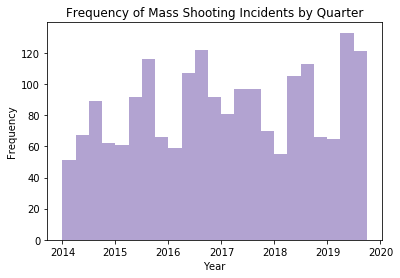

In [25]:
# define a new figure
fig = plt.figure()
# specify that only a single subplot will be placed within the figure
Incident_Date_plot = fig.add_subplot(1, 1, 1)
# plot a histogram using matplotlib for 'Incident_Date' while creating bins by quarter
Incident_Date_plot.hist(gun['Incident_Date'],bins=23,color=(0.5, 0.4, 0.7, 0.6))

# define a title and labels for the plot
Incident_Date_plot.set_xlabel('Year')
Incident_Date_plot.set_ylabel('Frequency')
Incident_Date_plot.set_title('Frequency of Mass Shooting Incidents by Quarter');

# show graphic
plt.show()

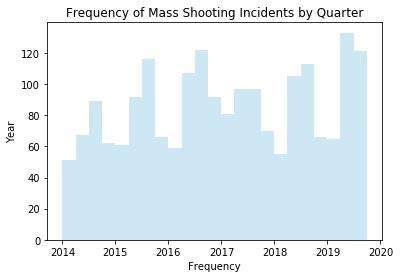

In [139]:
# set colors for our Seaborn plots
sns.set_color_codes("muted")
# use Seaborn's distplot() function to plot the distribution of Mass Shooting Incidents
# (kde=False) we cannot show a distribution line because computing the mean of datetime data fails 
sns.distplot(gun['Incident_Date'],bins=23,color="c", kde = False);

# give the plot a title using Matplotlib
plt.title('Frequency of Mass Shooting Incidents by Quarter');
plt.xlabel('Frequency');
plt.ylabel('Year');

**Chart Summary:**   
The distribution plots above show that during Summer (the third quarter of the year), there is a peak in Mass Shooting incidents. For 2017 there is not a pick as clear because there wasn't a high decrease during winter.

**EDA for attribute - State**   
We create a bar plot to find the frequency of 'State' in the dataset.  
First using matplotlib `bar` function and then using seaborn `countplot` function.

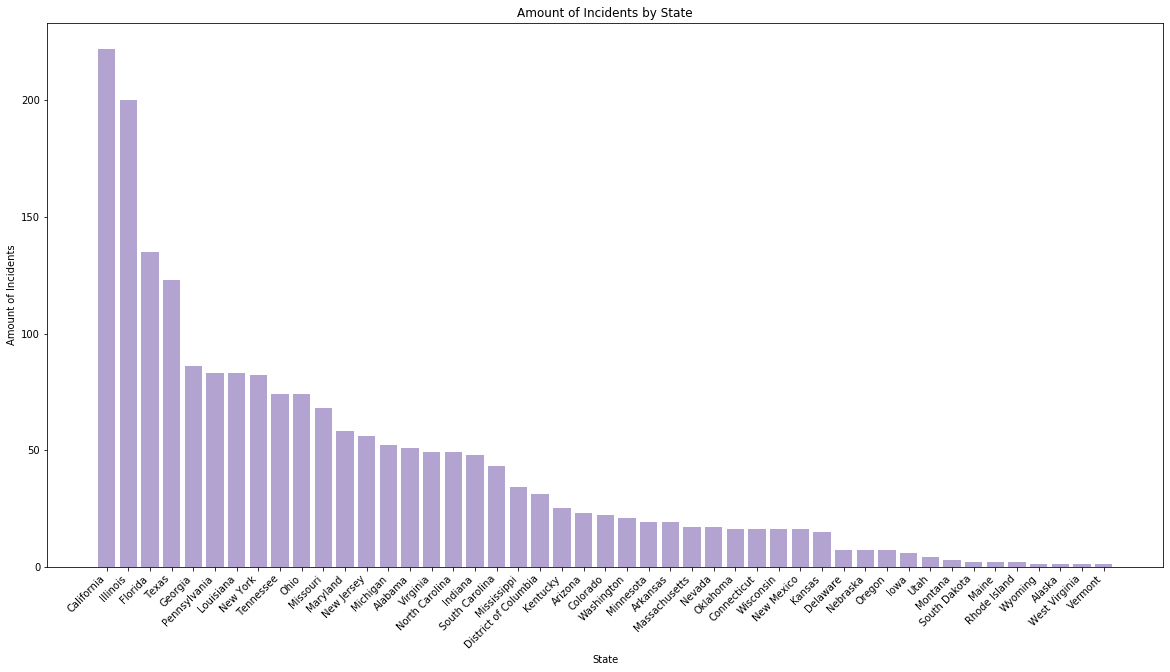

In [26]:
# define a new Matplotlib figure and define figure size
fig = plt.figure(figsize=(20,10))
# specify that only a single subplot will be placed within the figure
fig_state = fig.add_subplot(1, 1, 1)

# create a pandas series of the states in our data as the index and the frequency count as the value
state_count = gun['State'].value_counts()

# create bar plot of State frequency
fig_state.bar(state_count.index , state_count.values, color=(0.5, 0.4, 0.7, 0.6))

# define labels for the tick marks on the x axis to be 'state_count.index'
# rotate the tick labels and align to the right
fig_state.set_xticklabels(state_count.index ,rotation=45, horizontalalignment='right');

# define a title and labels for the plot
fig_state.set_title('Amount of Incidents by State');
fig_state.set_xlabel('State');
fig_state.set_ylabel('Amount of Incidents');

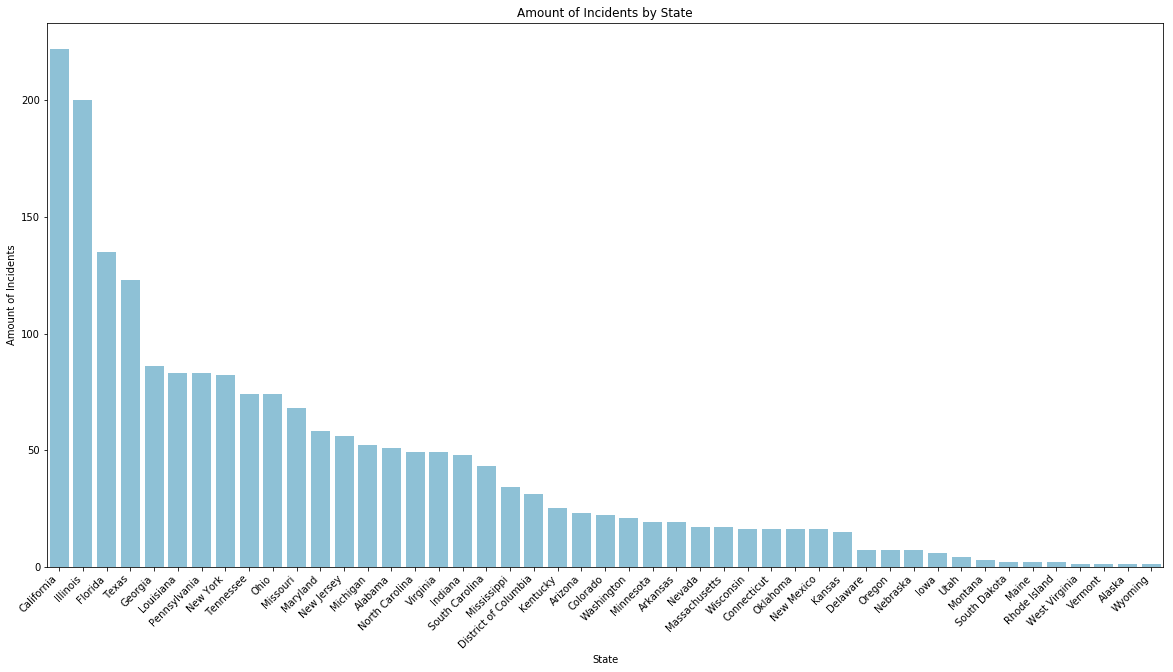

In [141]:
# define figure and size 
plt.figure(figsize=(20,10))

# use Seaborn's countplot() function to plot the frequency of State 
fig_state2 = sns.countplot(x="State", data=gun, order=gun['State'].value_counts().index, color="c");
# rotate labels
fig_state2.set_xticklabels(fig_state2.get_xticklabels(), rotation=45, horizontalalignment='right');

# give the plot a title using Matplotlib
plt.title('Amount of Incidents by State');
plt.xlabel('State');
plt.ylabel('Amount of Incidents');

**Chart Summary:**     
The bar plots above show that California and Illinois were "unsafe" and had the most incidents, while West Virginia, Vermont, Alaska, and Wyoming were the "safest" and had the least incidents during the years.


**EDA for attribute - City_or_County**   
We create a bar plot to find the frequency of 'City_or_County' in the dataset.  
First using matplotlib `bar` function and then using seaborn `barplot` function.  
Using the `describe()` function earlier, we saw that there are 671 unique values.   
Plotting 671 categories will not be useful, so we are limiting the plot to the top 20 categories. 

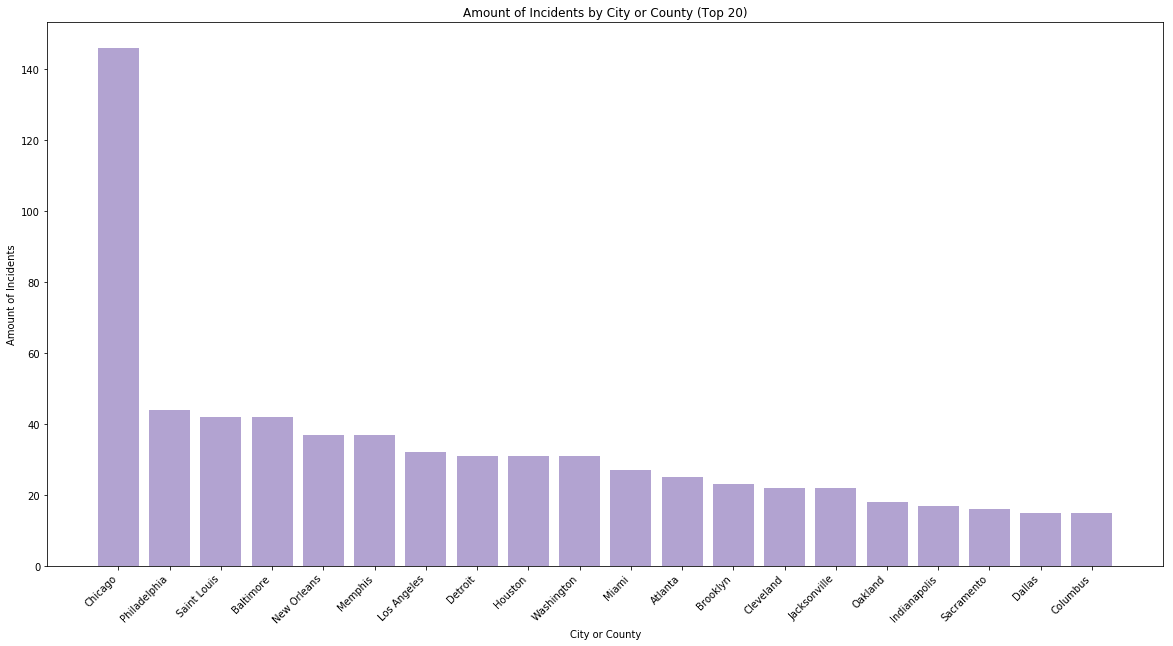

In [142]:
# create a subset of the 20 cities with top frequency in the data set 
gun_20cities = gun['City_or_County'].value_counts()[:20]

# define a new Matplotlib figure and define figure size
plt.figure(figsize=(20,10))
# create bar plot of the frequency for the top 20 Cities or Counties 
plt.bar(gun_20cities.index,gun_20cities.values, color=(0.5, 0.4, 0.7, 0.6));

# add title and axis names
plt.title('Amount of Incidents by City or County (Top 20)')
plt.xlabel('City or County')
plt.ylabel('Amount of Incidents')
 
# define X axis labels, rotate the tick labels and align to the right
plt.xticks(gun_20cities.index , rotation=45, horizontalalignment='right')
# show graphic
plt.show()

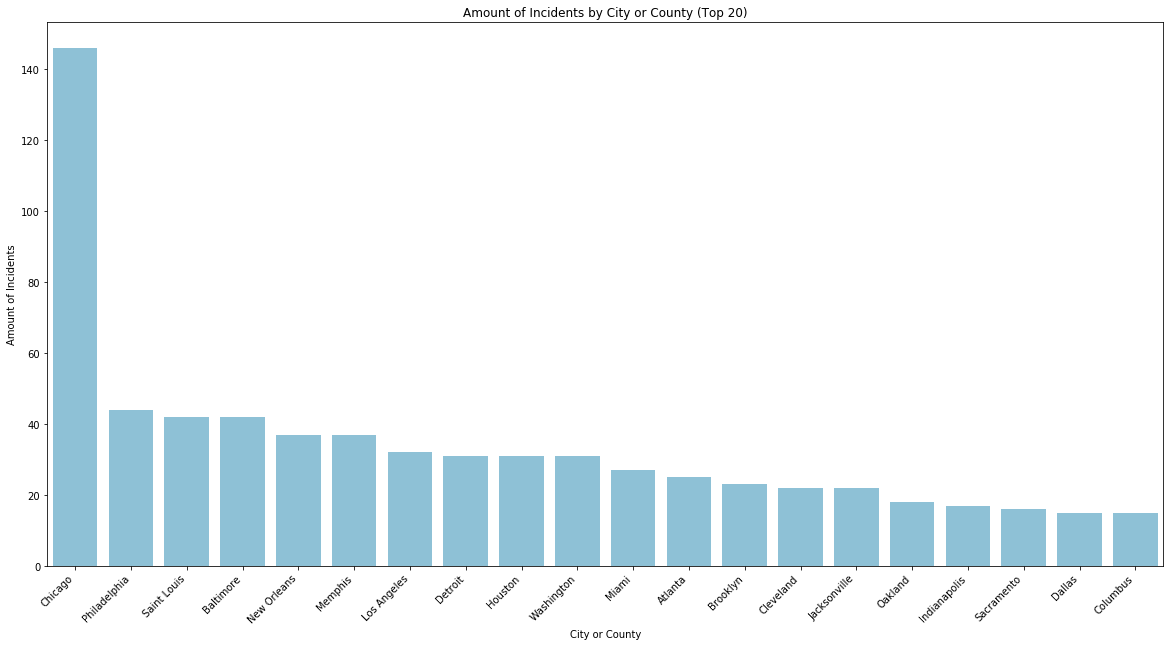

In [189]:
# define figure and size 
plt.figure(figsize=(20,10))

# use Seaborn's countplot() function to plot the frequency of State 
fig_City_or_County = sns.barplot(gun_20cities.index,gun_20cities.values, color="c");
# rotate labels
fig_City_or_County.set_xticklabels(fig_City_or_County.get_xticklabels(), rotation=45, horizontalalignment='right');

# give the plot a title using Matplotlib
plt.title('Amount of Incidents by City or County (Top 20)');
plt.xlabel('City or County');
plt.ylabel('Amount of Incidents');

**Chart Summary:**     
The bar plots above show that Chicago was by far the "least safe" city in the US with a disproportionately higher number of incidents. 

**EDA for attribute - Num_Killed**   
We create a box plot of 'Num_Killed' column to display the distribution of the data.  
First using matplotlib `boxplot` function and then using seaborn `boxplot` function.  

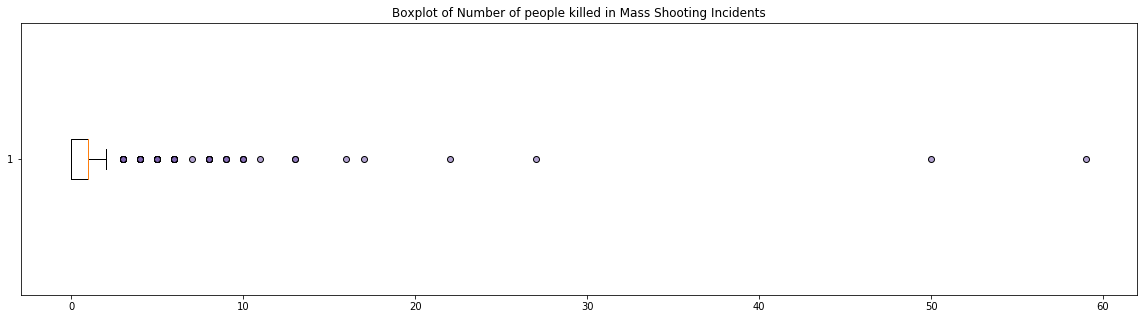

In [144]:
# define figure and size 
plt.figure(figsize=(20,5))

# define color of outliers to our color scheme 
purple_circle = dict(markerfacecolor=(0.5, 0.4, 0.7, 0.6))

# create box plot of the distribution of attribute 'Num_Killed' 
plt.boxplot(gun['Num_Killed'], vert=False, flierprops=purple_circle);
# set title for the graphic
plt.title('Boxplot of Number of people killed in Mass Shooting Incidents');
# show graphic
plt.show()

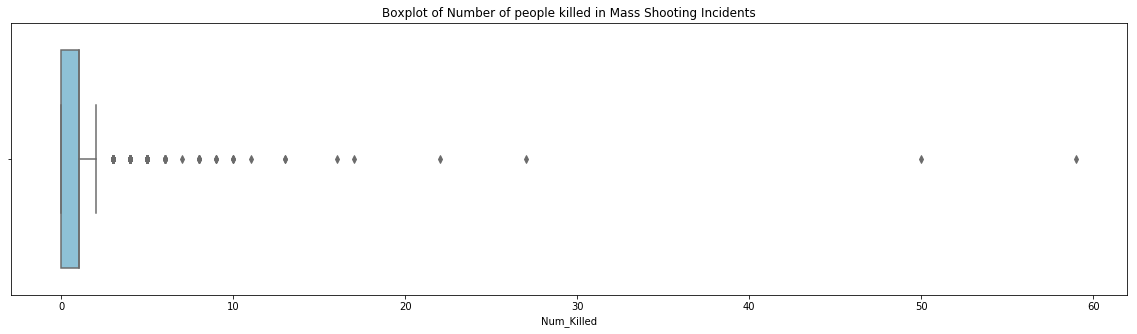

In [145]:
# define figure and size 
plt.figure(figsize=(20,5))

# use Seaborn's boxplot() function to plot the distribution of attribute 'Num_Killed' 
sns.boxplot(gun['Num_Killed'],orient='h',color="c")

# give the plot a title
plt.title('Boxplot of Number of people killed in Mass Shooting Incidents');

**Chart Summary:**     
The box plots above show that most incidents ended with 0 to very few people killed. In some incidents, up to 10 people were killed and during very few incidents, more than 10 people were killed. We can notice the 4 outliers with more than 20 people killed.

**EDA for attribute - Num_Injured**   
We create a box plot of 'Num_Injured' column to display the distribution of the data.  
First using matplotlib `boxplot` function and then using seaborn `boxplot` function.  

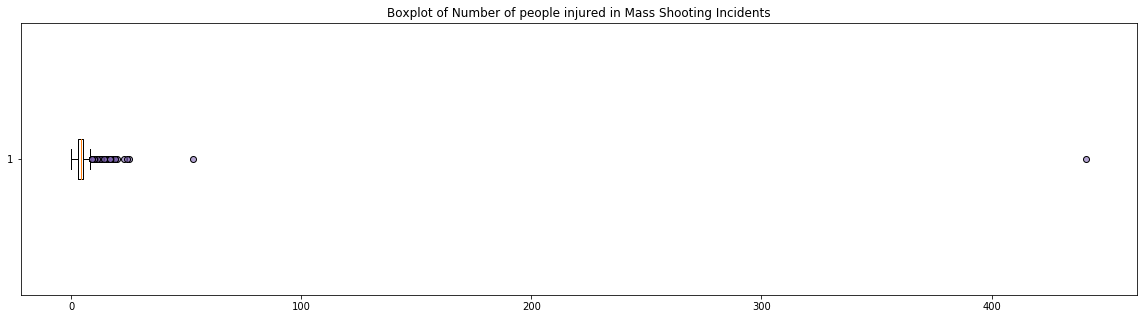

In [146]:
# define figure and size 
plt.figure(figsize=(20,5))

# create box plot of the distribution of attribute 'Num_Injured' 
plt.boxplot(gun['Num_Injured'], vert=False, flierprops=purple_circle);
# set title for the graphic
plt.title('Boxplot of Number of people injured in Mass Shooting Incidents');
# show graphic
plt.show()

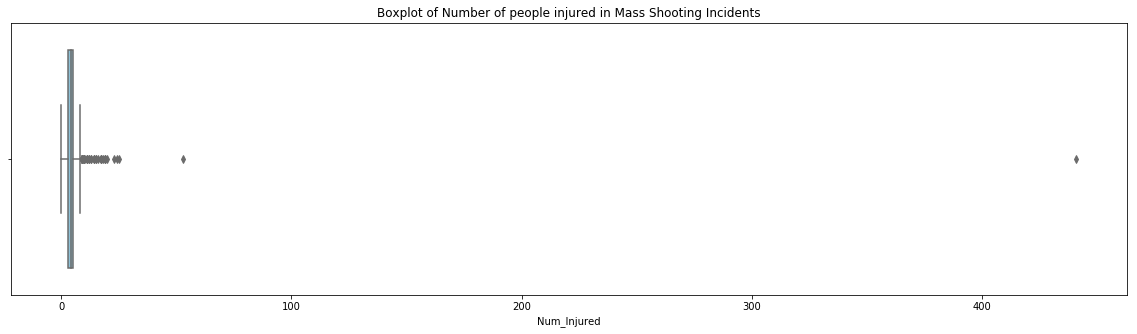

In [147]:
# define figure and size 
plt.figure(figsize=(20,5))

# use Seaborn's boxplot() function to plot the distribution of attribute 'Num_Injured' 
sns.boxplot(gun['Num_Injured'],orient='h',color="c")

# give the plot a title
plt.title('Boxplot of Number of people injured in Mass Shooting Incidents');

**Chart Summary:**     
The box plots above show that most incidents ended with 0 to very few people injured. In some incidents, up to 30 people were injured and during very few incidents, more than 30 people were injured. 
We can notice the outlier with more than 400 people injured and this is referring to the Las Vegas shooting.

### Inference ###
___

### What were the top 5 US States and Citys by Percentage of Total Mass Shooting incidents in the US over the period 2014-2019 ?###  
To answer this question we will create bar plots of the top 5 States and Cities, using Matplotlib and Seaborn. 

In [27]:
# create pandas series of top 5 states by proportion of Mass Shooting incidents
#We use the value_counts and take the proportion of the number of incidents (normalize=True).
top_5_state=gun['State'].value_counts(normalize=True)[:5]
top_5_state

California    0.111726
Illinois      0.100654
Florida       0.067942
Texas         0.061902
Georgia       0.043281
Name: State, dtype: float64

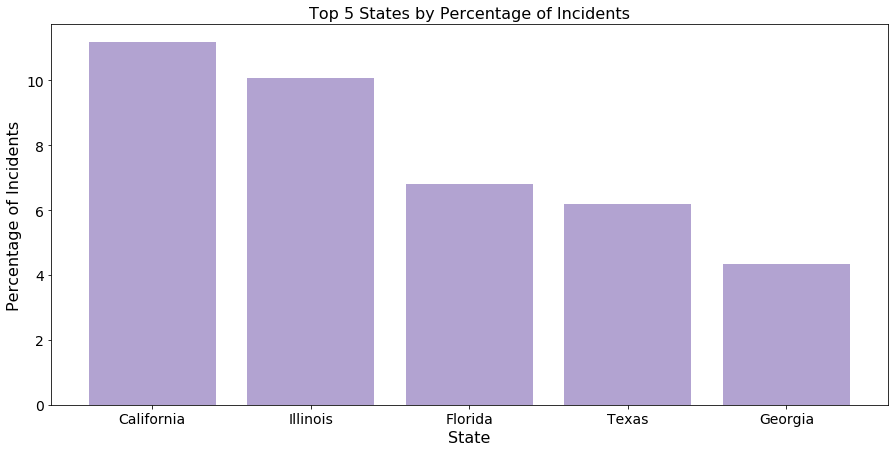

In [29]:
# define a new Matplotlib figure and define figure size
fig = plt.figure(figsize=(15,7))
# specify that only a single subplot will be placed within the figure
fig_state = fig.add_subplot(1, 1, 1)

# create bar plot of State percentage multiply the proportion by 100.
fig_state.bar(top_5_state.index , top_5_state.values*100, color=(0.5, 0.4, 0.7, 0.6))

# define a title and labels for the plot
fig_state.set_title('Top 5 States by Percentage of Incidents',fontsize=16);
fig_state.set_xlabel('State',fontsize=16);
fig_state.set_ylabel('Percentage of Incidents',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

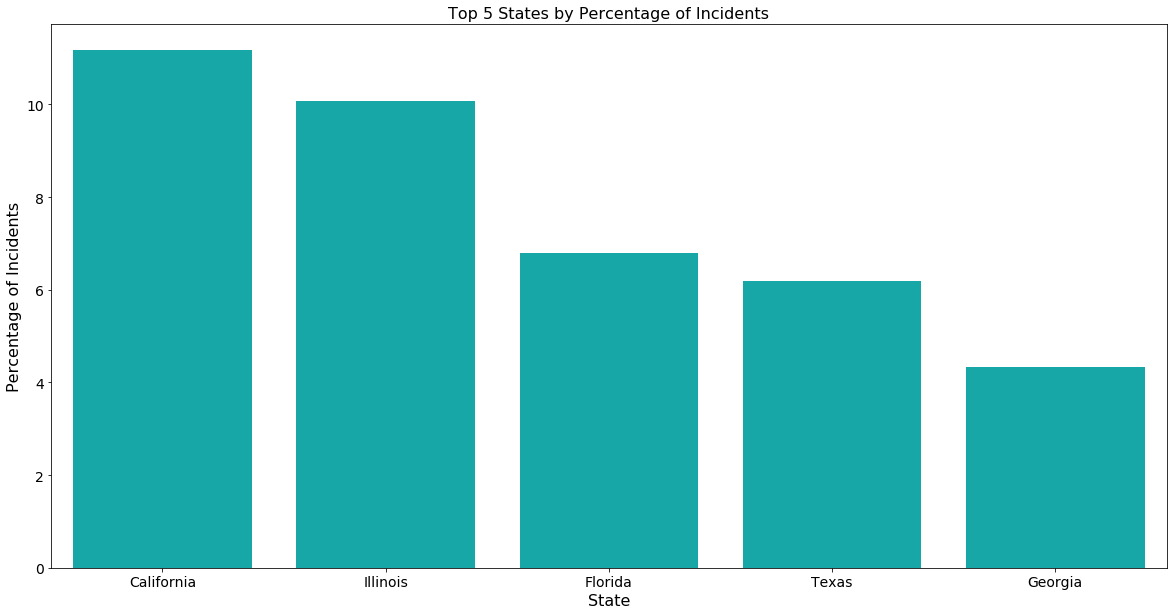

In [30]:
# define a new figure and figure size
plt.figure(figsize=(20,10))

# create bar plot of State percentage multiply the proportion by 100.
sns.barplot(top_5_state.index,top_5_state.values*100,color="c")

# define a title and labels for the plot
plt.title('Top 5 States by Percentage of Incidents',fontsize=16)
plt.xlabel('State',fontsize=16);
plt.ylabel('Percentage of Incidents',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

**Chart Summary:**  
The top 5 States by percentage of total Mass Shooting incidents in the US over the period 2014-2019 are: 
 1. California
 2. Illinois
 3. Florida
 4. Texas
 5. Georgia    

The difference in the Percentage of incidents between the top two states isn't extreme, and it descends gradually from the third state.  

In [31]:
# create pandas series of top 5 Cities or Counties by proportion of Mass Shooting incidents
#We use the value_counts and take the proportion of the number of incidents (normalize=True).
top_5_city= gun['City_or_County'].value_counts(normalize=True)[:5]
top_5_city

Chicago         0.073478
Philadelphia    0.022144
Baltimore       0.021137
Saint Louis     0.021137
New Orleans     0.018621
Name: City_or_County, dtype: float64

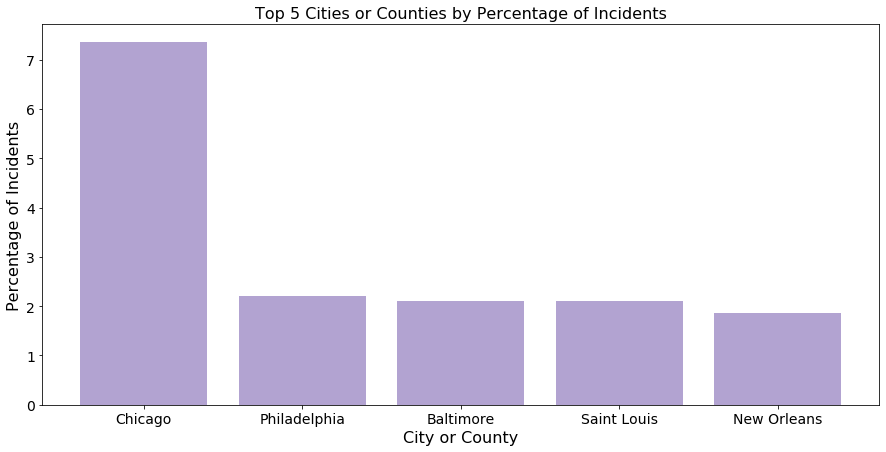

In [32]:
# define a new Matplotlib figure and define figure size
fig = plt.figure(figsize=(15,7))
# specify that only a single subplot will be placed within the figure
fig_city = fig.add_subplot(1, 1, 1)

# create bar plot of City or County percentage multiply the proportion by 100.
fig_city.bar(top_5_city.index ,top_5_city.values*100, color=(0.5, 0.4, 0.7, 0.6))

# define a title and labels for the plot
fig_city.set_title('Top 5 Cities or Counties by Percentage of Incidents',fontsize=16);
fig_city.set_xlabel('City or County',fontsize=16);
fig_city.set_ylabel('Percentage of Incidents',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

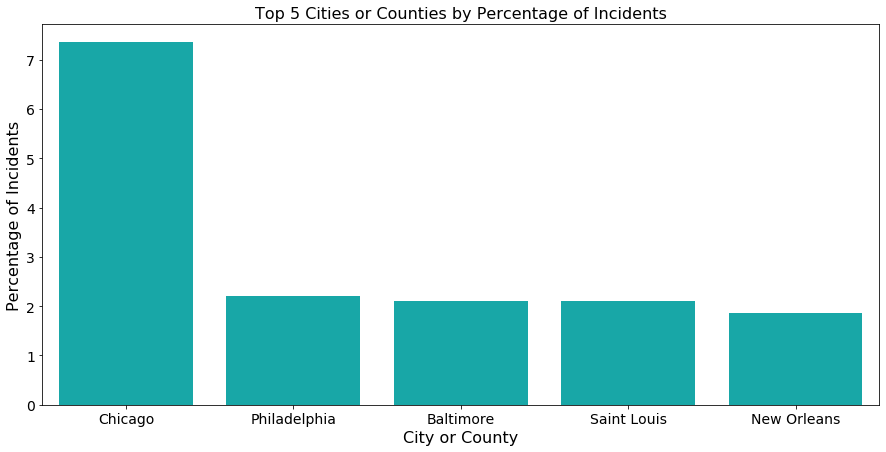

In [33]:
# define a new figure and figure size
plt.figure(figsize=(15,7))

# create bar plot of City or County percentage multiply the proportion by 100.
sns.barplot(top_5_city.index, top_5_city.values*100, color="c")

# define a title and labels for the plot
plt.title('Top 5 Cities or Counties by Percentage of Incidents',fontsize=16)
plt.xlabel('City or County',fontsize=16);
plt.ylabel('Percentage of Incidents',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

**Chart Summary:**  
The top 5 Cities or Counties by percentage of total Mass Shooting incidents in the US over the period 2014-2019 are: 
 1. Chicago
 2. Philadelphia
 3. Saint Louis
 4. Baltimore
 5. New Orleans
 
The difference in the percentage of incidents between Chicago and the other top four cities is extreme (about 5% more in Chicago).

### What was the distribution of total people involed (killed and injured) over that period in the city with the most incidents ? ###
Chicago is the city with the most amount of Mass Shooting incidents.   
To answer this question we will create line graphs of the distribution of total people involed (killed and injured) in Chicago during 2014 - 2019, using Matplotlib and Seaborn.

In [172]:
# create subset of the data frame with incidents in Chicago only 
gun_chi=gun.iloc[:,:][gun.City_or_County=='Chicago'].copy()
# create calculted column 'Total_Involved' for total number of people killed and injured per incident
gun_chi['Total_Involved']=gun_chi['Num_Injured']+gun_chi['Num_Killed']
# sort the subset by date 
gun_chi=gun_chi.sort_values('Incident_Date')

In [173]:
# describe subset
gun_chi.describe(include='all')

,Incident_Date,State,City_or_County,Num_Killed,Num_Injured,Total_Involved
count,146,146,146,146.000000,146.000000,146.000000
unique,135,1,1,NaN,NaN,NaN
top,2018-08-05 00:00:00,Illinois,Chicago,NaN,NaN,NaN
freq,5,146,146,NaN,NaN,NaN
first,2014-01-25 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2019-09-24 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.602740,4.205479,4.808219
std,NaN,NaN,NaN,0.834427,1.307368,1.158567
min,NaN,NaN,NaN,0.000000,0.000000,4.000000
25%,NaN,NaN,NaN,0.000000,4.000000,4.000000


We can see above that some days had more than one incident (there are 146 incidents but only 135 unique dates);  
therefore, we need to group by date to have the actual total people involved by date.

In [182]:
# group incident by date and summing the values of all the columns.
gun_chi=gun_chi.groupby(['Incident_Date']).sum()
gun_chi.head()

,Num_Killed,Num_Injured,Total_Involved
Incident_Date,,,
2014-01-25,1,4,5
2014-02-05,1,3,4
2014-03-08,0,6,6
2014-04-05,1,5,6
2014-04-20,0,5,5


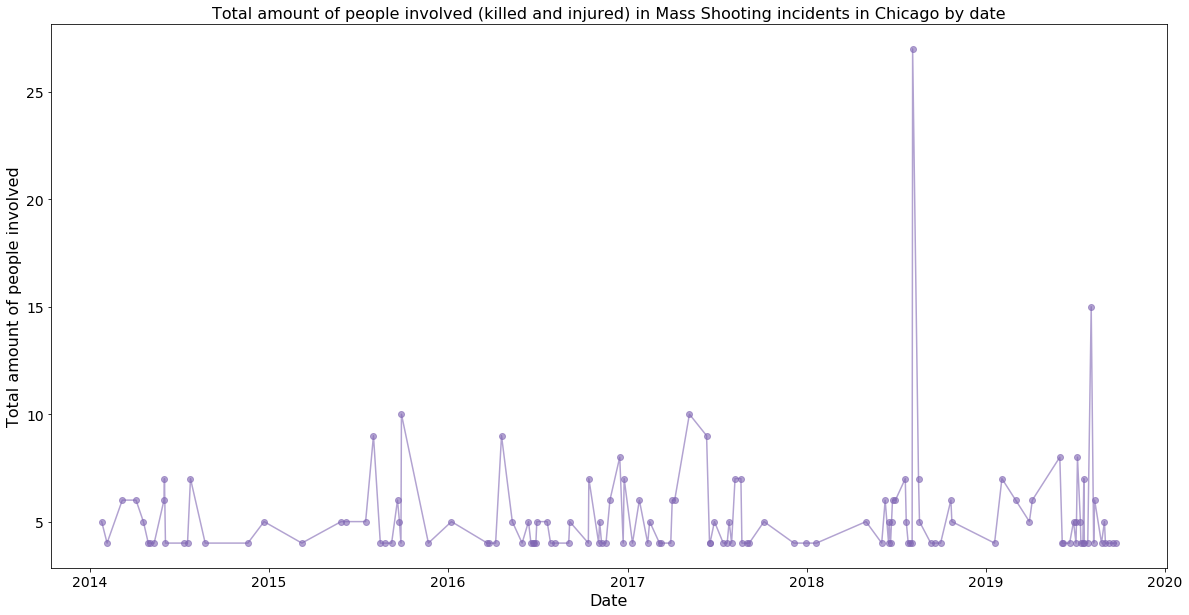

In [188]:
# define a new Matplotlib figure and define figure size
fig = plt.figure(figsize=(20,10))
# specify that only a single subplot will be placed within the figure
fig_chicago = fig.add_subplot(1, 1, 1)

# create line plot of Chicago's frequency by day. 
#In this case we don't need to add the x variable because Incident_Date is already the index 
#and Matplotlib can recognize it.
fig_chicago.plot('Total_Involved',marker='o',linestyle='-', data=gun_chi, color=(0.5, 0.4, 0.7, 0.6))

# define a title and labels for the plot
fig_chicago.set_title('Total amount of people involved (killed and injured) in Mass Shooting incidents in Chicago by date',fontsize=16);
fig_chicago.set_xlabel('Date',fontsize=16);
fig_chicago.set_ylabel('Total amount of people involved',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

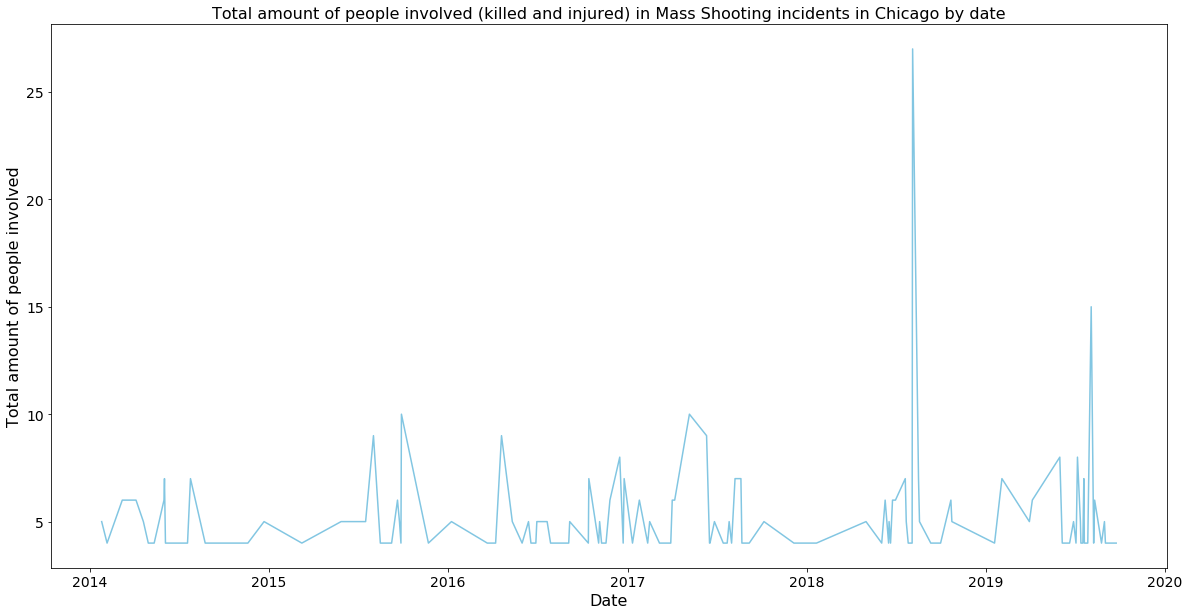

In [187]:
# define a new figure and figure size
plt.figure(figsize=(20,10))

# create line plot of Chicago's frequency by day.
#Seaborn needs to have both x and y specify every time. In this case we used the index as x.
sns.lineplot( y='Total_Involved', x=gun_chi.index,data=gun_chi,color="c")

# define a title and labels for the plot
plt.title('Total amount of people involved (killed and injured) in Mass Shooting incidents in Chicago by date',fontsize=16)
plt.xlabel('Date',fontsize=16);
plt.ylabel('Total amount of people involved',fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

**Chart Summary:**    
It seems like during the Summer season there is a peak in the number of people involved. This pattern is in correlation with the high number of Mass Shooting incidents during Summer in the entire country. At the same time, 2014 seems as a good year for Chicago, since not so many people were involved in shutguns.
Moreover, there is not a clear path of decreasing or increasing during the years.

### Conclusion ###
___

In conclusion, from the EDA we performed on the attributes, we saw that at the Entire-Country level, there is a pattern of a higher number of incidents during the Summer season. That would be interesting to investigate further and look at other attributes, for example, the number of police officers working during summer compared to other seasons.
Considering the number of Mass Shooting incidents, we can conclude that during the past six years, the states with the worst ranking are: California, Illinois, Florida, Texas, and Georgia. Moreover, could be interesting to have the population data and watch at the per capita (per million) number of incidents by state.

Chicago was the city with the highest percentage of Mass Shooting incidents in the country over the past six years, at 7.35%, and it doesn't seem to decrease.
Looking at the time series graphic of Total People Involved (killed and injured ) we created for Chicago, we can conclude that, Chicago follows the seasonality that is present in the data regarding the entire country. Chicago typically peaked in the number of people involved during the Summer season.

### References ###
___

[Awesome Public Datasets](https://github.com/awesomedata/awesome-public-datasets) (on GitHub) had a [Gun Violence DataSet Set](https://github.com/jamesqo/gun-violence-data) that we looked at, but decided it was too big for this project and its purposes. However, we liked the topic, which is why we chose to go directly to the source of the data [GVA-GUN VIOLENCE ARCHIVE](https://www.gunviolencearchive.org/ ), and pick appropriate data for our project. 